<a href="https://colab.research.google.com/github/ykhas/2515_proj/blob/main/Physics_Informed_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install deepxde

     |████████████████████████████████| 111 kB 4.1 MB/s 
     |████████████████████████████████| 100 kB 7.9 MB/s 


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import deepxde as dde
from deepxde.backend import tf

Deepxde backend not selected or invalid. Assuming tensorflow.compat.v1 for now.
Using backend: tensorflow.compat.v1



Setting the default backend to "tensorflow.compat.v1". You can change it in the ~/.deepxde/config.json file or export the DDEBACKEND environment variable. Valid options are: tensorflow.compat.v1, tensorflow, pytorch (all lowercase)
Instructions for updating:
non-resource variables are not supported in the long term



In [ ]:
# GENERATION OF TRUE DATA IN OUR SPACE / TIME DOMAIN
n_space_points = 20
n_time_points = 1000

def heat_eq_exact_solution(x, t):
    """
    Returns the exact solution for a given x and t (for sinusoidal initial conditions).
    
    Parameters
    ----------
    x : np.ndarray
    t : np.ndarray
    """
    
    return np.exp(-(np.pi**2*t))*np.sin(np.pi*x)

xvals = np.linspace(0, 1, n_space_points)
tvals = np.linspace(0, 0.5, n_time_points)

X,T = np.meshgrid(xvals, tvals)

heat_eq_true_solution = heat_eq_exact_solution(X, T)



(20,)
(1000, 20)
(1000, 20)


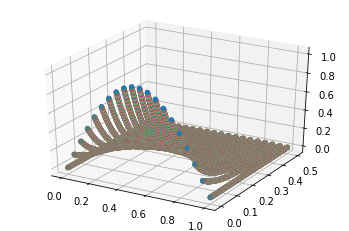

In [ ]:
# here we plot out the heat_eq_true_solution over time
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# print(xvals.shape)
# print(T.shape)
# print(heat_eq_true_solution.shape)
for t in range(n_time_points): 
  ax.scatter(xvals, T[t][1], heat_eq_true_solution[:][t])

plt.show()

Here we will plan out what we need to do 

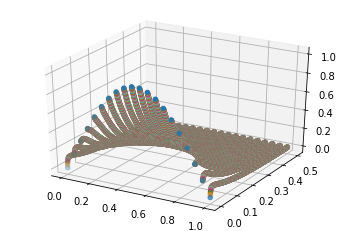

In [ ]:
# implementation of classical solution to heat equation using euler finite difference scheme

# mesh size
m = len(xvals); m
h = xvals[1] - xvals[0]
k = tvals[1] - tvals[0]

# create finite difference matrix, assuming boundary conditions are 0
d = np.empty(len(xvals)); d.fill(-2)
subd = np.empty(len(xvals) - 1); subd.fill(1)
supd = np.empty(len(xvals) - 1); supd.fill(1)

matrix = np.eye(len(xvals)) + k / h**2 * ( np.diag(d) + np.diag(subd, -1) + np.diag(supd, 1)); matrix

def compute_next_time_step(prev_result, matrix):
  return matrix.dot(prev_result)

solution = [np.sin(np.pi*xvals)] # populate with initial condition
for i in range(1, len(tvals)):
  solution.append(compute_next_time_step(solution[i-1], matrix))



fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for t in range(n_time_points): 
  # print(xvals.shape)
  # print(T[1].shape)
  # print(heat_eq_true_solution.shape)

  ax.scatter(xvals, T[t][1], solution[t])


plt.show()




1.   Generate some data for 2D heat equation. Look at DeepXDE to see which data should be generated. Read this data in from github.
2.   


